


# personality prediction using ML(Big Five personality traits)

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/home/hari/Documents/project/IPIP-FFM-data-8Nov2018/data-final.csv',delimiter='\t')

In [4]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
columns=data.columns
 

In [9]:
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [10]:
X=data[data.columns[0:50]]


In [12]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [13]:
X.shape

(1015341, 50)

In [14]:
X.isna().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [17]:
X=X.fillna(0)

In [18]:
X.isna().sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

In [19]:
#we are grouping the personality characters into 5 groups

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [20]:
y_means=kmeans.fit_predict(X)
y_means

array([3, 2, 2, ..., 1, 0, 1], dtype=int32)

In [21]:
#giving names to each cluster

one = kmeans.cluster_centers_[0]

two = kmeans.cluster_centers_[1]

three =kmeans.cluster_centers_[2]

four = kmeans.cluster_centers_[3]

five =kmeans.cluster_centers_[4]

In [22]:
#these are the values that got to each questions for this personality character

one

array([1.83474498, 3.56403057, 2.35759812, 4.01584521, 2.40379171,
       3.08415711, 1.79306864, 4.09277007, 2.14807166, 4.44958695,
       4.2624534 , 2.45351634, 4.53664083, 2.15157949, 3.51062019,
       3.80434631, 3.90063582, 3.63742826, 3.91636887, 3.81503999,
       2.28819557, 3.49716898, 2.37263115, 3.99666234, 2.38001423,
       3.97083894, 2.53106388, 3.58445105, 3.84490107, 3.20411581,
       3.06610356, 3.07279436, 3.94863167, 3.16849987, 2.37158692,
       3.15038443, 3.74153788, 2.79672731, 3.06858263, 3.46388902,
       3.52412555, 2.33887548, 4.05717347, 2.11143469, 3.48720626,
       2.04922959, 3.73774385, 3.14551136, 4.31733729, 3.74234232])

In [64]:
two

array([3.43279136, 1.93993068, 3.78488604, 2.51238201, 4.01824759,
       1.84846912, 3.62466659, 2.77566242, 3.74777994, 3.00775423,
       3.73859226, 2.97451326, 4.18132597, 2.4470141 , 3.24334382,
       3.39353708, 3.74219386, 3.38075578, 3.60593985, 3.1100765 ,
       2.19850346, 4.23721471, 2.65775183, 4.12879526, 2.0461141 ,
       3.94248614, 1.89074204, 3.86032406, 4.07245532, 3.82587724,
       2.95682867, 3.57890387, 3.82412436, 3.20065963, 2.24492901,
       3.49643833, 3.44168357, 2.82090208, 2.93256776, 3.4647546 ,
       3.72739614, 2.11844564, 4.22159445, 1.97931673, 3.94852742,
       1.786599  , 3.96122886, 3.35785645, 4.15817508, 4.18207663])

In [45]:
one_scores = {}
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]


In [46]:
one_scores

{'openness_score': 8.415599232686247,
 'conscientiousness_score': 0.23005909562113036,
 'extroversion_score': -8.66911480329836,
 'agreeableness_score': 2.197541034326761,
 'neuroticism_score': 14.583913460499048}

In [47]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}
    
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [60]:
    all_types_scores['one']

{'openness_score': 8.415599232686247,
 'conscientiousness_score': 0.23005909562113036,
 'extroversion_score': -8.66911480329836,
 'agreeableness_score': 2.197541034326761,
 'neuroticism_score': 14.583913460499048}

In [48]:
# all five personalities with scores

all_types_scores

{'one': {'openness_score': 8.415599232686247,
  'conscientiousness_score': 0.23005909562113036,
  'extroversion_score': -8.66911480329836,
  'agreeableness_score': 2.197541034326761,
  'neuroticism_score': 14.583913460499048},
 'two': {'openness_score': 18.09100637268287,
  'conscientiousness_score': 12.539681525610867,
  'extroversion_score': 6.524173068631723,
  'agreeableness_score': -1.0275430834855142,
  'neuroticism_score': 21.78794461037234},
 'three': {'openness_score': 9.920143794095711,
  'conscientiousness_score': 2.2458952322398393,
  'extroversion_score': -5.91025896779222,
  'agreeableness_score': 1.4898118707472228,
  'neuroticism_score': 15.795679663231367},
 'four': {'openness_score': 18.251154466428243,
  'conscientiousness_score': 12.237332336860142,
  'extroversion_score': 6.744329937457589,
  'agreeableness_score': -1.9455965071001882,
  'neuroticism_score': 21.79614128938408},
 'five': {'openness_score': 0.984862527031475,
  'conscientiousness_score': 0.7472968798

In [49]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_openness.append(personality_trait['openness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_extroversion.append(personality_trait['extroversion_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])



In [50]:
all_extroversion

[-8.66911480329836,
 6.524173068631723,
 -5.91025896779222,
 6.744329937457589,
 0.4464009885695095]

In [51]:
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))


In [52]:
all_extroversion_normalized

array([0.        , 0.98571657, 0.17899022, 1.        , 0.5914003 ])

In [53]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait

    counter+=1


In [54]:
normalized_all_types_scores

{'one': {'openness_score': 0.4303608865027901,
  'conscientiousness_score': 0.0,
  'extroversion_score': 0.0,
  'agreeableness_score': 1.0,
  'neuroticism_score': 0.6480015832917346},
 'two': {'openness_score': 0.9907248125823727,
  'conscientiousness_score': 1.0,
  'extroversion_score': 0.9857165693633861,
  'agreeableness_score': 0.2215841049048265,
  'neuroticism_score': 0.9995999546738049},
 'three': {'openness_score': 0.5174985630050923,
  'conscientiousness_score': 0.16376100470048208,
  'extroversion_score': 0.1789902180796239,
  'agreeableness_score': 0.829180384068112,
  'neuroticism_score': 0.707142780006856},
 'four': {'openness_score': 1.0,
  'conscientiousness_score': 0.975437980289784,
  'extroversion_score': 1.0,
  'agreeableness_score': 0.0,
  'neuroticism_score': 1.0},
 'five': {'openness_score': 0.0,
  'conscientiousness_score': 0.04201898044782859,
  'extroversion_score': 0.5914002966361431,
  'agreeableness_score': 0.34231457758022127,
  'neuroticism_score': 0.0}}

# ploting 

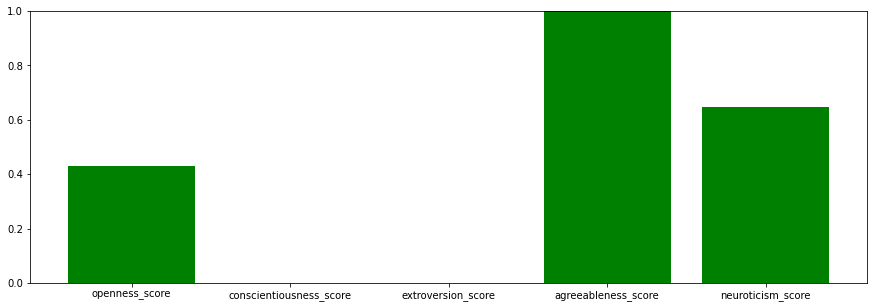

In [62]:

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

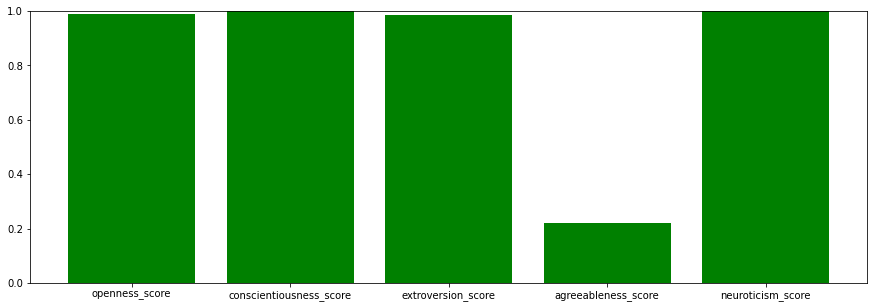

In [63]:

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

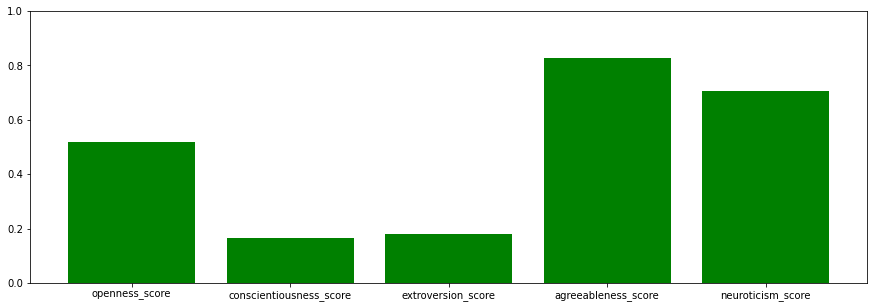

In [57]:

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

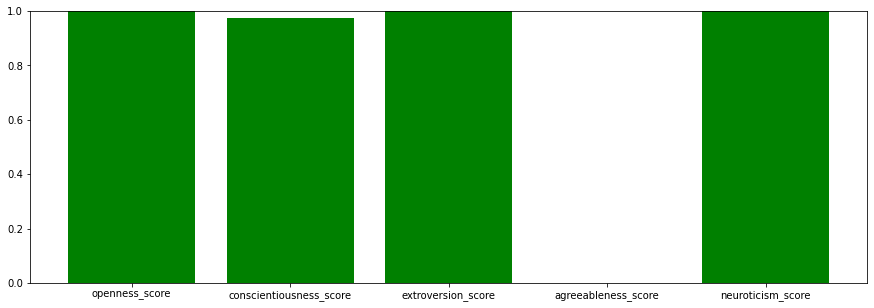

In [58]:

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

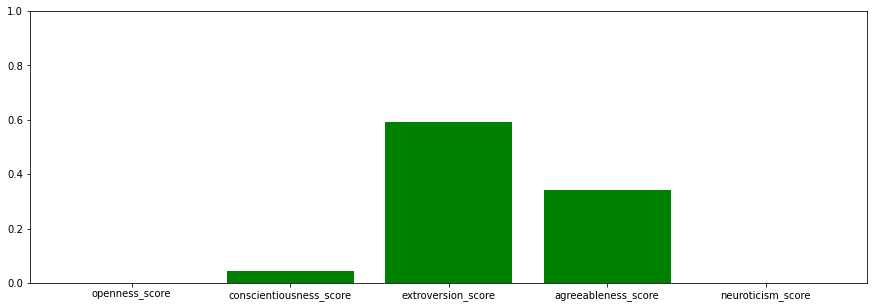

In [59]:

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()